In [1]:
# install and Import Tensorflow
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 450kB 50.6MB/s 
     |████████████████████████████████| 3.8MB 47.1MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
2.0.0


In [0]:
# other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get the data in colab
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2019-12-14 15:39:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2019-12-14 15:39:54 (61.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
# load in the data
data = pd.read_csv('moore.csv',header=None).values
data[0]
X = data[:,0].reshape(-1,1) # make it a 2D array of size NxD where D=1
Y = data[:,1]

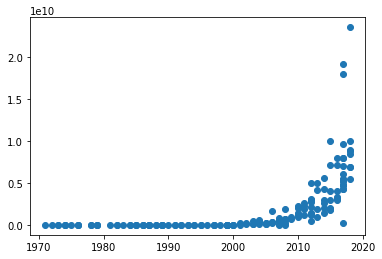

In [5]:
# Plot the data. (its exponential?)
plt.scatter(X,Y)

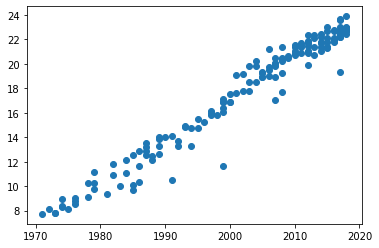

In [6]:
# since we want a linear model. we use the log
Y = np.log(Y)
plt.scatter(X,Y)

In [0]:
# We also center the X data so the values are not too large
# we could scale it too but then we'd ave to reverse the transformation later
X = X - X.mean()

In [0]:
# We create the Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)                                    
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')
# model.compile(optimizer='adam',loss='mse')

In [0]:
# Learning Rate Scheduler
def schedule(epoch, lr):
  if(epoch >=50):
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [10]:
# Train the model
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])


Train on 162 samples
Epoch 1/200
162/162 [==============================] - 1s 3ms/sample - loss: 423.7273
Epoch 2/200
162/162 [==============================] - 0s 89us/sample - loss: 421.8298
Epoch 3/200
162/162 [==============================] - 0s 101us/sample - loss: 467.8541
Epoch 4/200
162/162 [==============================] - 0s 88us/sample - loss: 336.8593
Epoch 5/200
162/162 [==============================] - 0s 82us/sample - loss: 239.5242
Epoch 6/200
162/162 [==============================] - 0s 82us/sample - loss: 162.0219
Epoch 7/200
162/162 [==============================] - 0s 79us/sample - loss: 165.5529
Epoch 8/200
162/162 [==============================] - 0s 71us/sample - loss: 97.0222
Epoch 9/200
162/162 [==============================] - 0s 101us/sample - loss: 60.8556
Epoch 10/200
162/162 [==============================] - 0s 75us/sample - loss: 40.2213
Epoch 11/200
162/162 [==============================] - 0s 76us/sample - loss: 24.5799
Epoch 12/200
162/162 [=

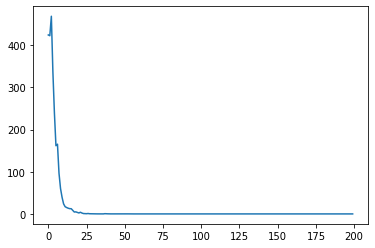

In [11]:
# Plot the Loss
plt.plot(r.history['loss'],label='loss')

In [12]:
# Get the Slope of the line
# THe slope of the line is related to the doubling rate of transistor count
print(model.layers) # note: there is only 1 layer here. Input layer does not count
print(model.layers[0].get_weights())

[array([[0.358359]], dtype=float32), array([17.773197], dtype=float32)]


In [0]:
# weight (W) is a 2D array and bias,scaler (B) is a 1D array
# the slope of the line is
a = model.layers[0].get_weights()[0][0,0]

In [14]:
print("Time to double: ", np.log(2)/a)

Time to double:  1.9342256315559536


# Part 2: Make Predictions

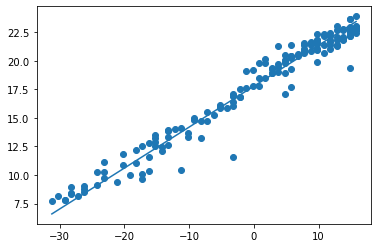

In [17]:
# Make sure the line fits out data
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

In [18]:
# Manual Calculation
# get the weights
w,b = model.layers[0].get_weights()
# Reshape X because we flatteneed it earlier
X = X.reshape(-1,1)
# (N x 1) x (1 x 1) + (1) -> (N x 1)
Yhat2 = (X.dot(w)+b).flatten()
# dont use == for floating points
np.allclose(Yhat,Yhat2)

True